In [ ]:
# Import required libraries
import numpy as np
import pandas as pd

In [ ]:
# Download fastai library
!pip install -Uqq fastbook
import fastbook

In [ ]:
# Import required libraries
from fastbook import *
from IPython.display import display,HTML

In [ ]:
# Import NLP module from fastai library
from fastai.text.all import *
path = untar_data(URLs.AMAZON_REVIEWS, dest = "Data")

In [ ]:
# Read 1/6th of the train dataset to reduce total time taken for training
train = pd.read_csv(path/'train.csv', header=None, nrows=500000)
train.head()

,0,1,2
0,3,more like funchuck,"Gave this to my dad for a gag gift after directing ""Nunsense,"" he got a reall kick out of it!"
1,5,Inspiring,"I hope a lot of people hear this cd. We need more strong and positive vibes like this. Great vocals, fresh tunes, cross-cultural happiness. Her blues is from the gut. The pop sounds are catchy and mature."
2,5,The best soundtrack ever to anything.,"I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny."
3,4,Chrono Cross OST,"The music of Yasunori Misuda is without question my close second below the great Nobuo Uematsu.Chrono Cross OST is a wonderful creation filled with rich orchestra and synthesized sounds. While ambiance is one of the music's major factors, yet at times it's very uplifting and vigorous. Some of my favourite tracks include; ""Scars Left by Time, The Girl who Stole the Stars, and Another World""."
4,5,Too good to be true,Probably the greatest soundtrack in history! Usually it's better to have played the game first but this is so enjoyable anyway! I worked so hard getting this soundtrack and after spending [money] to get it it was really worth every penny!! Get this OST! it's amazing! The first few tracks will have you dancing around with delight (especially Scars Left by Time)!! BUY IT NOW!!


In [ ]:
# Read 1/6th of the test dataset to reduce total time taken for testing
test = pd.read_csv(path/'test.csv', header=None, nrows=110000)
test.head()

,0,1,2
0,1,mens ultrasheer,"This model may be ok for sedentary types, but I'm active and get around alot in my job - consistently found these stockings rolled up down by my ankles! Not Good!! Solution: go with the standard compression stocking, 20-30, stock #114622. Excellent support, stays up and gives me what I need. Both pair of these also tore as I struggled to pull them up all the time. Good riddance/bad investment!"
1,4,Surprisingly delightful,"This is a fast read filled with unexpected humour and profound insights into the art of politics and policy. In brief, it is sly, wry, and wise."
2,2,"Works, but not as advertised","I bought one of these chargers..the instructions say the lights stay on while the battery charges...true. The instructions doNT say the lights turn off when its done. Which is also true. 24 hours of charging and the lights stay on. I returned it thinking I had a bad unit.The new one did the same thing. I just kept it since it does charge...but the lights are useless since they seem to always stay on. It's a ""backup"" charger for when I manage to drain all my AAs but I wouldn't want this as my only charger."
3,2,Oh dear,"I was excited to find a book ostensibly about Muslim feminism, but this volume did not live up to the expectations.One essay, among other things, describes the veil as potentially liberating. It doesn't begin to explain how or why.Another, on Muslim women in Cape Town, claims that Muslim women there are separate but ""more than equal."" Gee whiz, what a disappointment.I had expected and hoped for at least one Muslim feminist condemnation of gender apartheid. But there is not a single one in the book.I'm surprised it didn't have an essay extolling the virtues of female genital mutilation.--Al..."
4,2,Incorrect disc!,"I am a big JVC fan, but I do not like this model, I was suspiscious when I saw several units in the return section of the store. I bought one anyway (new) and must say I am not happy. The unit sends out clicks to the receiver once in a while, the transition between scenes is not always smooth,(like a little pause) and while it is still fairly new I can't get any DVD,CD or even a DVD headcleaner to work. All I get is a ""incorrect disc"" message."


In [ ]:
# Add the correct column names
train.columns = ['ratings', 'title', 'review']
train.head()

,ratings,title,review
0,3,more like funchuck,"Gave this to my dad for a gag gift after directing ""Nunsense,"" he got a reall kick out of it!"
1,5,Inspiring,"I hope a lot of people hear this cd. We need more strong and positive vibes like this. Great vocals, fresh tunes, cross-cultural happiness. Her blues is from the gut. The pop sounds are catchy and mature."
2,5,The best soundtrack ever to anything.,"I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny."
3,4,Chrono Cross OST,"The music of Yasunori Misuda is without question my close second below the great Nobuo Uematsu.Chrono Cross OST is a wonderful creation filled with rich orchestra and synthesized sounds. While ambiance is one of the music's major factors, yet at times it's very uplifting and vigorous. Some of my favourite tracks include; ""Scars Left by Time, The Girl who Stole the Stars, and Another World""."
4,5,Too good to be true,Probably the greatest soundtrack in history! Usually it's better to have played the game first but this is so enjoyable anyway! I worked so hard getting this soundtrack and after spending [money] to get it it was really worth every penny!! Get this OST! it's amazing! The first few tracks will have you dancing around with delight (especially Scars Left by Time)!! BUY IT NOW!!


In [ ]:
# Check major statistics for the train dataset
train.describe()

,ratings
count,500000.000000
mean,3.016060
std,1.411655
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [ ]:
# Add the correct column names
test.columns = ['ratings', 'title', 'review']
test.head()

,ratings,title,review
0,1,mens ultrasheer,"This model may be ok for sedentary types, but I'm active and get around alot in my job - consistently found these stockings rolled up down by my ankles! Not Good!! Solution: go with the standard compression stocking, 20-30, stock #114622. Excellent support, stays up and gives me what I need. Both pair of these also tore as I struggled to pull them up all the time. Good riddance/bad investment!"
1,4,Surprisingly delightful,"This is a fast read filled with unexpected humour and profound insights into the art of politics and policy. In brief, it is sly, wry, and wise."
2,2,"Works, but not as advertised","I bought one of these chargers..the instructions say the lights stay on while the battery charges...true. The instructions doNT say the lights turn off when its done. Which is also true. 24 hours of charging and the lights stay on. I returned it thinking I had a bad unit.The new one did the same thing. I just kept it since it does charge...but the lights are useless since they seem to always stay on. It's a ""backup"" charger for when I manage to drain all my AAs but I wouldn't want this as my only charger."
3,2,Oh dear,"I was excited to find a book ostensibly about Muslim feminism, but this volume did not live up to the expectations.One essay, among other things, describes the veil as potentially liberating. It doesn't begin to explain how or why.Another, on Muslim women in Cape Town, claims that Muslim women there are separate but ""more than equal."" Gee whiz, what a disappointment.I had expected and hoped for at least one Muslim feminist condemnation of gender apartheid. But there is not a single one in the book.I'm surprised it didn't have an essay extolling the virtues of female genital mutilation.--Al..."
4,2,Incorrect disc!,"I am a big JVC fan, but I do not like this model, I was suspiscious when I saw several units in the return section of the store. I bought one anyway (new) and must say I am not happy. The unit sends out clicks to the receiver once in a while, the transition between scenes is not always smooth,(like a little pause) and while it is still fairly new I can't get any DVD,CD or even a DVD headcleaner to work. All I get is a ""incorrect disc"" message."


In [ ]:
# Check major statistics for the test dataset
test.describe()

,ratings
count,110000.000000
mean,3.022209
std,1.413290
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


<AxesSubplot:>

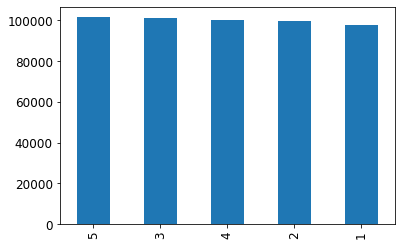

In [ ]:
# Check the distribution of the number of data points for each of the 5 classes
train['ratings'].value_counts().plot(kind='bar')

In [ ]:
# The distribution seems fairly equal which is perfect for training the model
train['ratings'].value_counts()

5    101573
3    100983
4     99960
2     99892
1     97592
Name: ratings, dtype: int64

In [ ]:
# Array of all the reviews in the train data frame
txts = L([i for i in train['review']])

In [ ]:
# Tokenize all the rows
tok = Tokenizer.from_df(train)
tok.setup(train)

toks = txts.map(tok)
toks[0]

(#26) ['xxbos','xxmaj','gave','this','to','my','dad','for','a','gag'...]

In [ ]:
# Numericalize all the tokens from the previous step
num = Numericalize()
num.setup(toks)
nums = toks.map(num)
nums[0][:10]

TensorText([   2,    8,  378,   19,   15,   37, 1748,   22,   14, 6655])

In [ ]:
# Seeing the indexes of how the words are stored for the first row only
num.encodes(toks[0])

TensorText([    2,     8,   378,    19,    15,    37,  1748,    22,    14,  6655,   550,   105,  3581,    24,     0,    11,    24,    67,   148,    14, 21449,  2221,    59,    17,    16,    40])

In [ ]:
# Decoding the indexes to see the tokens
num.decode(nums[0])

(#26) ['xxbos','xxmaj','gave','this','to','my','dad','for','a','gag'...]

In [ ]:
# Concatening just the reviews column of both train and test datasets to help in creating the language model
language_model = pd.concat([train, test], axis=0)[['review']]
language_model.head()

,review
0,"Gave this to my dad for a gag gift after directing ""Nunsense,"" he got a reall kick out of it!"
1,"I hope a lot of people hear this cd. We need more strong and positive vibes like this. Great vocals, fresh tunes, cross-cultural happiness. Her blues is from the gut. The pop sounds are catchy and mature."
2,"I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny."
3,"The music of Yasunori Misuda is without question my close second below the great Nobuo Uematsu.Chrono Cross OST is a wonderful creation filled with rich orchestra and synthesized sounds. While ambiance is one of the music's major factors, yet at times it's very uplifting and vigorous. Some of my favourite tracks include; ""Scars Left by Time, The Girl who Stole the Stars, and Another World""."
4,Probably the greatest soundtrack in history! Usually it's better to have played the game first but this is so enjoyable anyway! I worked so hard getting this soundtrack and after spending [money] to get it it was really worth every penny!! Get this OST! it's amazing! The first few tracks will have you dancing around with delight (especially Scars Left by Time)!! BUY IT NOW!!


In [ ]:
# Checking major statistics of the new dataset
language_model.describe()

,review
count,610000
unique,609640
top,.it was a freebie. it was a paperless book. why not take advantage of it right? not like WHOA! book!
freq,7


In [ ]:
# Splitting the new dataset randomly into 90% train and 10% validation 
data_lm = DataBlock(
    blocks=TextBlock.from_df('review', is_lm=True),
    get_x=ColReader('text'), 
    splitter=RandomSplitter(0.1) 
)

In [ ]:
# Internally tokenizing and numericalizing the data. The sequence length used is the default used for training the Wikipedia 103 language model
data_lm = data_lm.dataloaders(language_model, bs=64, seq_len=72)

In [ ]:
# Randomly show 5 of the rows from the language model
data_lm.show_batch(max_n=5)

,text,text_
0,"xxbos xxmaj all the reviews aside , this a good movie , and i enjoy it every time i watch it . xxmaj i 'd call it a sleeper . xxmaj walter xxmaj xxunk is great as always . xxbos i like xxmaj sapphire even better than her newest book xxup diamond . xxmaj the characters are rich and memorable . xxmaj the female character is strong of will and the male","xxmaj all the reviews aside , this a good movie , and i enjoy it every time i watch it . xxmaj i 'd call it a sleeper . xxmaj walter xxmaj xxunk is great as always . xxbos i like xxmaj sapphire even better than her newest book xxup diamond . xxmaj the characters are rich and memorable . xxmaj the female character is strong of will and the male is"
1,"under the skin , but the needle tips end up snapping the hair when you try to tweeze it xxunk i use a combination , this to xxunk the hair , and another product to actually pull the hair out . xxbos a xxmaj world xxmaj lit xxmaj only by xxmaj fire , is a succinct , fast paced history of xxmaj europe from the fall of the xxmaj roman xxmaj empire","the skin , but the needle tips end up snapping the hair when you try to tweeze it xxunk i use a combination , this to xxunk the hair , and another product to actually pull the hair out . xxbos a xxmaj world xxmaj lit xxmaj only by xxmaj fire , is a succinct , fast paced history of xxmaj europe from the fall of the xxmaj roman xxmaj empire and"
2,"and the heroine is not very likeable . xxmaj keeping the reader in the dark about what 's going on made it hard to read , i almost gave up on it . i certainly did nt hurry to finish the book . xxmaj at least i got more done around the house because it was n't hard to put down . xxbos xxmaj xxunk is not your conventional "" club ""","the heroine is not very likeable . xxmaj keeping the reader in the dark about what 's going on made it hard to read , i almost gave up on it . i certainly did nt hurry to finish the book . xxmaj at least i got more done around the house because it was n't hard to put down . xxbos xxmaj xxunk is not your conventional "" club "" album"
3,"the most xxunk decline in any rock band since … well , since forever , as far as i can tell . xxmaj please , please , bring back the brilliant musicians who wrote xxmaj ride the xxmaj tiger , xxmaj painful , xxmaj may i xxmaj sing xxmaj with xxmaj me , and other stand - outs of intelligent rock music . xxbos xxmaj tough … xxup m&d is not an","most xxunk decline in any rock band since … well , since forever , as far as i can tell . xxmaj please , please , bring back the brilliant musicians who wrote xxmaj ride the xxmaj tiger , xxmaj painful , xxmaj may i xxmaj sing xxmaj with xxmaj me , and other stand - outs of intelligent rock music . xxbos xxmaj tough … xxup m&d is not an easy"
4,"concern was under the xxunk i would have to sign for my purchase when it arived as i found it in my mail box . xxbos i liked xxmaj robert xxmaj harris ' xxmaj pompeii . i read it in a few days , enjoyed it , and found the story to be well written . xxmaj but - there is a but - it could be boring at times . xxmaj","was under the xxunk i would have to sign for my purchase when it arived as i found it in my mail box . xxbos i liked xxmaj robert xxmaj harris ' xxmaj pompeii . i read it in a few days , enjoyed it , and found the story to be well written . xxmaj but - there is a but - it could be boring at times . xxmaj it"


In [ ]:
# Save the langauge model
torch.save(data_lm, path/'amazon_sentiments_data_lm.pkl')

In [ ]:
# Load in the language model
data_lm = torch.load(path/'amazon_sentiments_data_lm.pkl')

In [ ]:
# Defining the LSTM architecture of the train model and the metrics used to acertain its accuracy
learn_model = language_model_learner(
    data_lm, AWD_LSTM,
    metrics=[accuracy, Perplexity()]).to_fp16()

In [ ]:
# Check the various layers of the model
learn_model.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(60008, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(60008, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1152, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=60008, bias=True)
    (output_dp): RNNDropout()
  )
)

SuggestedLRs(lr_min=0.014454397559165954, lr_steep=7.585775847473997e-07)

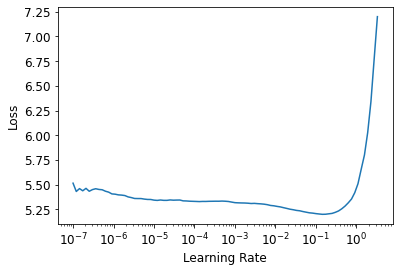

In [ ]:
# Find the best learning rate for training the language model
learn_model.lr_find()

In [ ]:
# Fine tuning the language model based on the datablock which would enable in predicting the next word in a sentence for the Amazon Reviews dataset specifically
learn_model.fine_tune(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.464083,4.020653,0.278305,55.737476,1:43:27


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.020104,3.741584,0.309275,42.164738,1:55:21
1,3.907612,3.660431,0.318986,38.878109,1:55:08
2,3.847359,3.599310,0.325338,36.572998,1:55:10
3,3.794616,3.555801,0.329626,35.015869,1:58:58
4,3.762177,3.542487,0.331098,34.552742,1:59:09


In [ ]:
# Save the encoder that understands the intricate language semantics of our dataset
learn_model.save_encoder('finetuned_encoder')

In [ ]:
# Load the encoder that understands the intricate language semantics of our dataset
learn_model.load_encoder('finetuned_encoder')

In [ ]:
# Predict the full sentence of a negative prompt using our trained language model
learn_model.predict("This laptop was horrible because", 30, temperature=0.80)

'This laptop was horrible because partition ports require seperate recovery inputs county temperature control groups caesar connections between computers businesses frequently loosens up significantly resulting in reboots causing headaches during installing connectors -- day.it pruitt'

In [ ]:
# Predict the full sentence of a positive prompt using our trained language model
learn_model.predict("I absolutely loved this dress because", 20, temperature=0.80)

'i absolutely loved this dress because of the bridesmaids sizing chart permanently warrantied by consumers competed over 28 lbs in 1953 . Nonetheless fitting 365'

In [ ]:
# Download necessary libraries for Easy Data Augmentation (EDA)
!pip install -U nltk

Requirement already up-to-date: nltk in /opt/conda/envs/fastai/lib/python3.8/site-packages (3.5)


In [ ]:
# Download necessary libraries for Easy Data Augmentation (EDA)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Make new dataframe containing 10x less data than the train dataset because EDA would generate new data from lesser existing data
eda = pd.read_csv(path/'train.csv', nrows=50000, usecols=[0,2])
eda.head()

,3,"Gave this to my dad for a gag gift after directing ""Nunsense,"" he got a reall kick out of it!"
0,5,"I hope a lot of people hear this cd. We need more strong and positive vibes like this. Great vocals, fresh tunes, cross-cultural happiness. Her blues is from the gut. The pop sounds are catchy and mature."
1,5,"I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny."
2,4,"The music of Yasunori Misuda is without question my close second below the great Nobuo Uematsu.Chrono Cross OST is a wonderful creation filled with rich orchestra and synthesized sounds. While ambiance is one of the music's major factors, yet at times it's very uplifting and vigorous. Some of my favourite tracks include; ""Scars Left by Time, The Girl who Stole the Stars, and Another World""."
3,5,Probably the greatest soundtrack in history! Usually it's better to have played the game first but this is so enjoyable anyway! I worked so hard getting this soundtrack and after spending [money] to get it it was really worth every penny!! Get this OST! it's amazing! The first few tracks will have you dancing around with delight (especially Scars Left by Time)!! BUY IT NOW!!
4,5,"There's a reason this CD is so expensive, even the version that's not an import.Some of the best music ever. I could listen to every track every minute of every day. That's about all i can say."


In [ ]:
# Convert csv to txt file required for EDA to run
eda.to_csv('train2.txt', header=True, index=False, sep='\t', mode='a')

In [ ]:
# Run the python command for EDA with 2 new augmentations per existing review and perform all 4 augmentations with its default alpha values as stated in the research paper
%run eda_nlp/code/augment.py --input=eda_nlp/data/train2.txt --num_aug=2 --alpha_sr=0.1 --alpha_rd=0.1 --alpha_ri=0.1 --alpha_rs=0.1

/notebooks/eda_nlp/code/eda.py:177: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  words = [word for word in words if word is not '']


generated augmented sentences with eda for eda_nlp/data/train2.txt to eda_nlp/data/eda_train2.txt with num_aug=2


In [ ]:
# Convert txt to csv and replace train dataset with new EDA data
train = pd.read_csv('eda_train2.txt', delimiter="\t", header=None, names=["ratings", "review"])

In [ ]:
# Check data to see if each data point is repeated 3 times, first is original and the next 2 are augmentations
train.head()

,ratings,review
0,3,gave this to my papa for a gag gift after organise nunsense he got a reall kick out of it
1,3,gave this to my dad for a gag after directing nunsense he got reall kick out of it
2,3,gave this to my dad for a gag gift after directing nunsense he got a reall kick out of it
3,5,i hope a lot of learn people hear this cd we need more strong and positive vibes like majuscule this great vocals fresh tunes cross cultural happiness her blues is from the gut the pop sounds majuscule are catchy and mature
4,5,i promise a lot of people hear this cd we need more strong and positive vibe like this great vocals fresh tune up cross cultural happiness her blues is from the gut the pop sounds are catchy and mature


In [ ]:
# Create the datablock for the classifier now splitting the dataset into 80% train and 20% validation
blocks = (TextBlock.from_df('review', seq_len=data_lm.seq_len, vocab=data_lm.vocab), CategoryBlock())
data_classifier = DataBlock(blocks=blocks,
                get_x=ColReader('text'),
                get_y=ColReader('ratings'),
                splitter=RandomSplitter(0.2))

In [ ]:
# Perform tokenization and numericalization of the loaded data automatically
data_classifier = data_classifier.dataloaders(train, bs=64)

In [ ]:
# Randomly show 5 of the rows from the classifier
data_classifier.show_batch(max_n=5)

,text,category
0,xxbos i rate it stars because caliber i m sure there are far superior cameras out there doh but i do nt think you can well disposed get them for the price xxunk i ve only caliber used the xxunk camera for about a day now but it took great pictures of my horse even in his stall the flash is really good xxunk and the pictures speech sound turn out so nicely this is my first digital camera that i ve owned so i was very surprised at the quality its pretty easy to xxunk with and pretty user friendly information technology to me its so tiny i m afraid to put it in my pocket or in my purse for fear that it might scratch but that s not a bad thing it makes it very easy to carry around like carrying around another cell phone it took,4
1,xxbos i would return the pants if i could unfortunately i ve never not fit into a size before so i had taken off all equal the tags stickers etc off the pants before xxunk trying zip up them on stupid me that being said my only complaint is that this feels more like not a is usually a perfect altogether fit for me or sometimes a little loose but just a little this is the first time i ve put on a pair of w pants where i could nt actually button the xxunk button or zip up the zipper all the way i even equal sir thomas more had to do the jump and tug you know where you have to non jump and then tug the pants up to get them on which was a bad sign by itself equal now other than that the pants are,3
2,xxbos not a bad device mo in total but it has so many issues i want a device that will adapt to my way of working not the other way around after spending days of developing work arounds i decided to look elswhere for the price the dsm is a great machine i am willing to pony up a few more bucks xxunk to miserable get something a sour bit group a xxunk more powerfull that can handle a more varied set of sour video formats and stream higher bit rate files subject sour xxunk if you want to xxunk group a stream mp and lower bit rate mpeg and mpeg videos the dsm is great if you are looking to support divx dvd quality mpeg captures and hdtv content this is not the player atomic number for you all in all this is an group a entire new product,3
3,xxbos chime in on this one this nous may be douglas moore my favorite gary moore album of all including thin lizzy colosseum ii skid row early solo stuff and whatever else is lurking out there its a bit agency of group a a toss up between run for cover berth and we want moore only because i saw the tour opening for rush on their grace under pressure tour the live album is absolutely mind blowing as was equal along gm in concert for studio lps run for cover has to take the biscuit from out and out rockers to melodic ballads helper to in xxunk whatever happened to that series control by the way lug it has something for everyone on and bonus tracks too the production is excellent unlike a lot of s metal albums if you are uncertain xxunk as to where to start with gary,5
4,xxbos i really liked this movie i own xxunk the first two on dvd and despite xxunk what a lot of people think of michael bays movies i lamentable took this for what it was a fun movie bringing an iconic childhood toy to life i grew up watching the cartoons and was really excited when i heard set up xxunk xxunk there were going to be live action movies now i did enjoy this movie more than the second one not that i xxunk hated revenge of the fallen i loved the action sequences and the special effects i admit i watch them more for the in that location variant actual transformers than the human actors i did nt care for patrick xxunk character role i do nt watch greys anatomy so i have no previous attachment own to him as an actor and bond i really did nt,5


In [ ]:
# Defining the LSTM architecture of the train model and the metrics used to acertain its accuracy
learn_model = text_classifier_learner(data_classifier, AWD_LSTM, metrics=[accuracy], drop_mult=0.5)


In [ ]:
# Load up the previously trained language model encoder
learn_model.load_encoder('finetuned_encoder')

SuggestedLRs(lr_min=0.06309573650360108, lr_steep=0.013182567432522774)

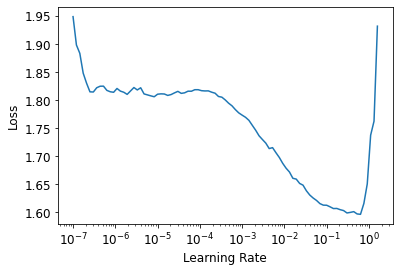

In [ ]:
# Find the best learning rate for training the classifer
learn_model.lr_find()

In [ ]:
# Train the model one epoch with the min learning rate from previous step
learn_model.fit_one_cycle(1, 6.3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.263276,1.123682,0.510705,10:15


In [ ]:
# Freeze all the layers in the model except for the last two and train again with a smaller learning rate, the sliced values follows the instructions as per Jeremy Howard's FastAI course
learn_model.freeze_to(-2)
learn_model.fit_one_cycle(1, slice(6.3e-3/(2.6**4),6.3e-2))

epoch,train_loss,valid_loss,accuracy,time
0,1.080581,1.521779,0.583016,12:04


In [ ]:
# Freeze all the layers in the model except for the last three and train again with a smaller learning rate, the sliced values follows the instructions as per Jeremy Howard's FastAI course
learn_model.freeze_to(-3)
learn_model.fit_one_cycle(1, slice(5e-3/(2.6**4),1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.932273,1.375420,0.648593,18:45


In [ ]:
# Unfreeze all the layers in the model and train again with a smaller learning rate, the sliced values follows the instructions as per Jeremy Howard's FastAI course
learn_model.unfreeze()
learn_model.fit_one_cycle(3, slice(1e-3/(2.6**4),3e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.800249,1.019997,0.701892,24:44
1,0.699172,0.732268,0.766314,24:28
2,0.621948,0.575920,0.787680,24:22


In [ ]:
# Save the final trained model
learn_model.save('trained_model_eda2')

Path('models/trained_model_eda2.pth')

In [ ]:
# Export the final trained model
learn_model.export()

In [ ]:
# Load the final trained model
learn_model.load('trained_model_eda2')

<AxesSubplot:>

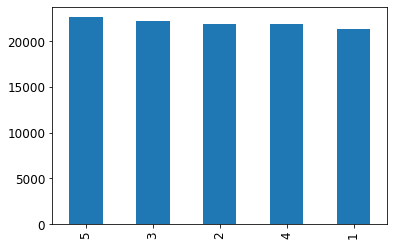

In [ ]:
test['ratings'].value_counts().plot(kind='bar')

In [ ]:
test['predictions'] = test['review'].apply(lambda row: str(learn_model.predict(row)[0]))
print("Test Accuracy: ", accuracy_score(test['ratings'], test['predictions']))